INNITIAL SETUP
==============================================================================

In [4]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Change to dataset directory (update the path as per your Drive structure)
dataset_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray"
if os.path.exists(dataset_path):
    print("Dataset folder found! 🎉")
    print("Files in dataset folder:", os.listdir(dataset_path))
else:
    print("⚠ Dataset folder not found! Check the path.")



Mounted at /content/drive
Dataset folder found! 🎉
Files in dataset folder: ['shenzhen_metadata.csv', 'train', 'test', 'shenzhen_final_processed.csv', 'processed_images', 'images', 'shenzhen', 'shenzhen_processed.csv', 'TB_Model.h5', 'TB_Model_Quantized.tflite', 'TB_Model.tflite']


In [5]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")


GPU Available: True
GPU Name: Tesla T4


In [6]:
import tensorflow as tf
import torch

# Check if TensorFlow detects the GPU
print("TensorFlow GPU:", "Available" if tf.config.list_physical_devices('GPU') else "Not Available")

# Check if PyTorch is using the GPU
print("PyTorch Device:", torch.device("cuda" if torch.cuda.is_available() else "cpu"))


TensorFlow GPU: Available
PyTorch Device: cuda


PHASE 1
===============================================================================


In [10]:
dataset_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/"
csv_path = os.path.join(dataset_path, "shenzhen_metadata.csv")


In [11]:
# Remove classes with only 1 sample
df_filtered = df[df['findings'].map(df['findings'].value_counts()) > 1]

# Now split the dataset
train_df, test_df = train_test_split(df_filtered, test_size=0.2, stratify=df_filtered['findings'], random_state=42)

print(f"Training Samples: {len(train_df)}")
print(f"Testing Samples: {len(test_df)}")


NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

# Remove rare classes (with only 1 sample)
df_filtered = df[df['findings'].map(df['findings'].value_counts()) > 1]

# Perform stratified split
train_df, test_df = train_test_split(df_filtered, test_size=0.2, stratify=df_filtered['findings'], random_state=42)

print(f"Training Samples: {len(train_df)}")
print(f"Testing Samples: {len(test_df)}")

# Dataset info
print("Dataset Info:")
print(df_filtered.info())

# Missing values check
print("\nMissing Values in Dataset:")
print(df_filtered.isnull().sum())

# Unique labels
print("\nUnique Labels:", df_filtered['findings'].unique())


In [ ]:
df_filtered.loc[:, 'findings'] = df_filtered['findings'].replace({
    'PTB in the left lower field': 'PTB',
    'PTB in the left upper field': 'PTB',
    'secondary PTB  in the right upper field': 'PTB',
    'Bilateral secondary PTB': 'PTB',
    'PTB in the right lower field': 'PTB',
    'Old PTB in the right upper field': 'PTB',
    'PTB  in the right upper field': 'PTB',
    'left PTB': 'PTB',
    'PTB in the bilateral upper field': 'PTB',
    'left PTB,left pleurisy': 'PTB',
    'secondary PTB  in the bilateral upper field': 'PTB',
    'right upper PTB': 'PTB',
    'bilateral PTB, right pleurisy': 'PTB',
    'secondary PTB  in the bilateral upper fields': 'PTB',
    'left secondary PTB': 'PTB',
    'secondary PTB  in the left upper field': 'PTB',
    'right secondary PTB': 'PTB',
    'bilateral secondary PTB': 'PTB',
    'Left PTB': 'PTB',
    'PTB in the bilateral upper fields': 'PTB',
    'right lower field PTB': 'PTB'
})


In [ ]:
print(df_filtered['findings'].value_counts())


In [ ]:
df_filtered = df_filtered[df_filtered['findings'].map(df_filtered['findings'].value_counts()) > 1]

# Now, split the dataset
train_df, test_df = train_test_split(df_filtered, test_size=0.2, stratify=df_filtered['findings'], random_state=42)

print(f"Training Samples: {len(train_df)}")
print(f"Testing Samples: {len(test_df)}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=train_df['findings'])
plt.title("Class Distribution in Training Set")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['findings'] = le.fit_transform(train_df['findings'])
test_df['findings'] = le.transform(test_df['findings'])

print("Encoded Labels:", dict(enumerate(le.classes_)))


In [ ]:
print(X_train.dtypes)


In [12]:
from sklearn.preprocessing import LabelEncoder

# Drop 'study_id' (since it's an image filename, not a feature)
X_train = X_train.drop(columns=['study_id'])
X_test = X_test.drop(columns=['study_id'])

# Encode 'sex' (convert Male/Female to 0/1)
le = LabelEncoder()
X_train['sex'] = le.fit_transform(X_train['sex'])
X_test['sex'] = le.transform(X_test['sex'])


NameError: name 'X_train' is not defined

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Baseline Model Accuracy: {accuracy:.2f}")


In [ ]:
print(y_train.value_counts(normalize=True))


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['age']] = scaler.fit_transform(X_train[['age']])
X_test[['age']] = scaler.transform(X_test[['age']])


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Improved Model Accuracy: {accuracy:.2f}")


In [ ]:
image_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/images"

In [ ]:
import os
from sklearn.model_selection import train_test_split

image_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/images/images"

# Check if directory exists
if not os.path.exists(image_dir):
    raise ValueError(f"⚠ The directory '{image_dir}' does not exist. Check if the path is correct.")

# Get list of image files
all_images = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Ensure images are found
if not all_images:
    raise ValueError(f"⚠ No image files found in '{image_dir}'. Check if the directory is correct.")

# Split images into train and test sets (80% train, 20% test)
train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)

print(f"✅ Train set: {len(train_images)} images")
print(f"✅ Test set: {len(test_images)} images")


In [ ]:
import shutil

train_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/train"
test_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/test"

# Create directories if they don’t exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Move images to train & test directories
for img_path in train_images:
    shutil.move(img_path, os.path.join(train_dir, os.path.basename(img_path)))

for img_path in test_images:
    shutil.move(img_path, os.path.join(test_dir, os.path.basename(img_path)))

print("✅ Images moved successfully!")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/train"
test_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/test"

# Verify dataset paths
if not os.path.exists(train_dir):
    raise ValueError(f"⚠ Training directory '{train_dir}' not found!")

if not os.path.exists(test_dir):
    raise ValueError(f"⚠ Testing directory '{test_dir}' not found!")

# Data Augmentation & Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting training set for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load Images as Batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust size based on model
    batch_size=32,
    class_mode='binary'  # Use 'categorical' if more than 2 classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

print("✅ Data pipeline ready! 🚀")


In [ ]:
import os
print(os.path.exists(csv_path))  # Should return True

In [ ]:
import os
import pandas as pd

# Define the correct path to the CSV file
csv_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_metadata.csv"  # Update if needed

# Check if the file exists
print(os.path.exists(csv_path))  # Should return True

# Load the CSV file (only if it exists)
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print(df.head())  # Display first few rows
else:
    print("File not found! Check the path.")


In [ ]:
import pandas as pd

# Load the dataset
csv_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_metadata.csv"  # Update if needed
df = pd.read_csv(csv_path)

# Check if it loaded correctly
print(df.head())


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!ls /content/drive/MyDrive/AROGYA/TB_Chest_Xray/

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
file_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_metadata.csv"
df = pd.read_csv(file_path)

# Rename 'sex' to 'gender' for consistency
df.rename(columns={'sex': 'gender'}, inplace=True)

# Drop missing values in necessary columns
df = df.dropna(subset=['findings', 'age', 'gender'])

# Simplify 'findings' column: Group all tuberculosis cases under 'tuberculosis'
df['findings'] = df['findings'].apply(lambda x: 'tuberculosis' if 'TB' in x or 'PTB' in x or 'ptb' in x else x)

# ✅ 1️⃣ Class Distribution: Normal vs. TB
plt.figure(figsize=(8, 5))
sns.countplot(x='findings', data=df, order=['normal', 'tuberculosis'], palette={'normal': 'blue', 'tuberculosis': 'red'})
plt.xlabel("Findings")
plt.ylabel("Count")
plt.title("Class Distribution: Normal vs. TB")
plt.show()

# ✅ 2️⃣ Age Distribution of Patients
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color="purple")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Patients")
plt.show()

# ✅ 3️⃣ TB Cases by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="gender", hue="findings", palette="tab10", order=['Male', 'Female'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("TB Cases by Gender")
plt.legend(title="Findings", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [ ]:
import os
print("Metadata File Exists:", os.path.exists("/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_metadata.csv"))

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_metadata.csv"
df = pd.read_csv(file_path)

# Standard Processing
df.columns = df.columns.str.lower()
if 'sex' in df.columns:
    df.rename(columns={'sex': 'gender'}, inplace=True)
df.dropna(subset=['findings', 'age', 'gender'], inplace=True)
df['findings'] = df['findings'].apply(lambda x: 'tuberculosis' if 'tb' in x.lower() else 'normal')

# ✅ Save the Processed File
processed_path = "/content/shenzhen_processed.csv"
df.to_csv(processed_path, index=False)

print(f"✅ Processed file saved at: {processed_path}")


In [ ]:
import shutil
import os

# Define source and destination paths
source_path = "/content/shenzhen_processed.csv"
destination_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_processed.csv"

# Check if source file exists
if os.path.exists(source_path):
    # Move the file
    shutil.move(source_path, destination_path)
    print(f"✅ File moved successfully to: {destination_path}")
else:
    print("❌ Source file does not exist!")


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_metadata.csv"  # Ensure correct path

# Check if file exists before loading
if not os.path.exists(file_path):
    raise FileNotFoundError(f"❌ Error: File not found at {file_path}")

print("✅ Metadata file found. Loading dataset...")

df = pd.read_csv(file_path)

# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Rename 'sex' column to 'gender' for compatibility with Arogya
if 'sex' in df.columns:
    df.rename(columns={'sex': 'gender'}, inplace=True)

# Check for missing values and drop them if found
df.dropna(subset=['findings', 'age', 'gender'], inplace=True)

# Standardize 'findings' values (Group all TB-related labels under 'tuberculosis')
df['findings'] = df['findings'].apply(lambda x: 'tuberculosis' if 'tb' in x.lower() else 'normal')

print("✅ Data preprocessing complete.")

# Create the output directory if it doesn't exist
output_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray"
os.makedirs(output_dir, exist_ok=True)

# Visualizing Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='findings', data=df, order=['normal', 'tuberculosis'], hue='findings',
              palette={'normal': 'blue', 'tuberculosis': 'red'}, legend=False)
plt.xlabel("Findings")
plt.ylabel("Count")
plt.title("Class Distribution: Normal vs. TB")
plt.show()

# Visualizing Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color="purple")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Patients")
plt.show()

# Visualizing TB Cases by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="gender", hue="findings", palette="tab10")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("TB Cases by Gender")
plt.legend(title="Findings", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Save processed data for Arogya integration
output_file = os.path.join(output_dir, "shenzhen_processed.csv")
df.to_csv(output_file, index=False)

print(f"✅ Processed file saved at: {output_file}")


In [ ]:
import os
file_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_processed.csv"
print("File Exists:", os.path.exists(file_path))


In [ ]:
import os

all_files = []
for root, dirs, files in os.walk("/content/drive/MyDrive/AROGYA/"):
    all_files.extend(files)

print(all_files)


In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_processed.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['age']] = scaler.fit_transform(df[['age']])

print(df.head())


In [ ]:
processed_file_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_final_processed.csv"
df.to_csv(processed_file_path, index=False)

print("Processed dataset saved successfully!")


In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Removes unwanted spaces


In [ ]:
import pandas as pd

# Load Data
file_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_processed.csv"

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("Error: File not found. Ensure the file exists in the directory.")
    df = pd.DataFrame()  # Create an empty DataFrame as a fallback

# Ensure DataFrame is not empty
if df.empty:
    print("Warning: DataFrame is empty. Check data source.")

# Rename 'gender' to 'sex' (if it exists)
if 'gender' in df.columns:
    df.rename(columns={'gender': 'sex'}, inplace=True)

# Check unique values in 'sex' before processing
if 'sex' in df.columns:
    print("Unique values in 'sex' before processing:", df['sex'].unique())

    # Handle missing values in 'sex'
    if not df['sex'].mode().empty:
        mode_sex = df['sex'].mode()[0]  # Get the mode
        df['sex'] = df['sex'].fillna(mode_sex)
    else:
        df['sex'] = df['sex'].fillna("Unknown")

    # ✅ Fix Mapping Issue: Convert 'Male' → 0, 'Female' → 1
    df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

# Handle missing values in 'age' (if column exists)
if 'age' in df.columns:
    df['age'] = df['age'].fillna(df['age'].median())

# Handle missing values in 'findings' (if column exists)
if 'findings' in df.columns:
    if not df['findings'].mode().empty:
        df['findings'] = df['findings'].fillna(df['findings'].mode()[0])
    else:
        df['findings'] = df['findings'].fillna("Unknown")

# Display first few rows to verify changes
print(df.head())

# Check for missing values after processing
print("Missing values after processing:")
print(df.isnull().sum())

# Print final column names
print("Final column names:", df.columns)

# Save processed file
final_file_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_final_processed.csv"
df.to_csv(final_file_path, index=False)

print("✅ Processing complete! File saved as 'shenzhen_final_processed.csv'.")


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
csv_file = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_final_processed.csv"
image_folder = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/images/images/"
processed_image_folder = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/processed_images/"

# Load dataset
df = pd.read_csv(csv_file)

# Ensure output folder exists
if not os.path.exists(processed_image_folder):
    os.makedirs(processed_image_folder)

# Image Processing Configuration
IMG_SIZE = (224, 224)  # ResNet50 standard input size

# Check for missing images
missing_images = []
for study_id in df["study_id"]:
    image_path = os.path.join(image_folder, study_id)
    if not os.path.exists(image_path):
        missing_images.append(study_id)
        continue

    # Read and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMG_SIZE)  # Resize to 224x224
    img = img / 255.0  # Normalize pixel values

    # Save processed image
    processed_path = os.path.join(processed_image_folder, study_id)
    cv2.imwrite(processed_path, (img * 255).astype(np.uint8))  # Convert back to 0-255 for saving

# Print missing images
if missing_images:
    print(f"⚠️ Missing {len(missing_images)} images:")
    print(missing_images)
else:
    print("✅ All images are present and processed.")

# Data Augmentation (If Needed)
augment = False  # Change to True if you want augmentation

if augment:
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True
    )

    for study_id in df["study_id"]:
        img_path = os.path.join(processed_image_folder, study_id)
        img = cv2.imread(img_path)
        img = np.expand_dims(img, axis=0)  # Convert to batch format

        # Generate augmented images
        aug_iter = datagen.flow(img, batch_size=1)
        aug_img = next(aug_iter)[0].astype(np.uint8)

        # Save augmented image
        aug_path = os.path.join(processed_image_folder, f"aug_{study_id}")
        cv2.imwrite(aug_path, aug_img)

    print("✅ Data augmentation completed.")


In [ ]:
import os
import shutil

# Define paths
train_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/train"
test_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/test"

# Ensure class folders exist
for category in ["Normal", "TB"]:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Function to move images based on their labels
def move_images(source_dir):
    for filename in os.listdir(source_dir):
        src_path = os.path.join(source_dir, filename)

        if os.path.isdir(src_path):  # Skip directories
            continue

        # Determine the category based on filename
        if filename.endswith("_0.png"):
            dest_path = os.path.join(source_dir, "Normal", filename)
        elif filename.endswith("_1.png"):
            dest_path = os.path.join(source_dir, "TB", filename)
        else:
            print(f"⚠️ Unknown category: {filename} (Not moved)")
            continue

        # Move the file
        shutil.move(src_path, dest_path)

# Apply the function to both train and test directories
move_images(train_dir)
move_images(test_dir)

print("✅ Images have been successfully moved to their categories!")


In [ ]:
import os
import shutil

# Define paths
train_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/train"
test_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/test"

# Create class subfolders if they don’t exist
for category in ["Normal", "TB"]:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Function to move images based on filename
def organize_images(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)

        # Skip if it's already in a folder
        if os.path.isdir(file_path):
            continue

        # Move images based on category
        if "normal" in filename.lower():
            shutil.move(file_path, os.path.join(directory, "Normal", filename))
        elif "tb" in filename.lower() or "tuberculosis" in filename.lower():
            shutil.move(file_path, os.path.join(directory, "TB", filename))
        else:
            print(f"⚠️ Unknown category: {filename} (Not moved)")

# Move images in train and test sets
print("📂 Organizing train images...")
organize_images(train_dir)

print("📂 Organizing test images...")
organize_images(test_dir)

print("✅ Images moved successfully!")


In [ ]:
import os

train_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/train"
test_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/test"

for category in ["Normal", "TB"]:
    train_path = os.path.join(train_dir, category)
    test_path = os.path.join(test_dir, category)

    print(f"📂 Checking: {train_path}")
    print(f"🖼️ Train Images: {len(os.listdir(train_path)) if os.path.exists(train_path) else 'Folder Not Found'}")

    print(f"📂 Checking: {test_path}")
    print(f"🖼️ Test Images: {len(os.listdir(test_path)) if os.path.exists(test_path) else 'Folder Not Found'}\n")



In [ ]:
import pandas as pd
import os
import cv2
import numpy as np
import tensorflow as tf

# Load dataset
csv_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_processed.csv"
df = pd.read_csv(csv_path)

# Step 1: Check if 'gender' column exists before renaming
if "gender" in df.columns:
    df.rename(columns={"gender": "sex"}, inplace=True)

# Step 2: Handling Missing Values
df.loc[:, 'sex'] = df.get('sex', pd.Series(['Unknown'] * len(df)))  # Fill missing column
df.loc[:, 'age'] = df.get('age', pd.Series([df['age'].median()] * len(df)))  # Fill missing ages

# Convert 'sex' column to numerical values
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).fillna(-1)  # Assign -1 for Unknown

# Step 3: Image Processing
image_folder = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/images/images/"
processed_images = []

for study_id in df['study_id']:
    # Ensure study_id doesn't have extra .png
    study_id = str(study_id)  # Convert to string in case of NaN
    if not study_id.endswith(".png"):
        study_id += ".png"

    img_path = os.path.join(image_folder, study_id)

    if os.path.exists(img_path):  # Ensure file exists
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load in color (for ResNet)
        img = cv2.resize(img, (224, 224))  # Resize for ResNet50

        # Apply proper ResNet preprocessing
        img = tf.keras.applications.resnet50.preprocess_input(img)

        processed_images.append(img)
    else:
        print(f"⚠️ Image not found: {img_path}")

# Convert list to NumPy array and save
if processed_images:
    processed_images = np.array(processed_images)
    np.save("/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen/processed_images.npy", processed_images)
    print(f"✅ Processed {len(processed_images)} images successfully!")
else:
    print("❌ No valid images processed. Check your dataset.")


In [ ]:
import os

# Check if the directory exists
if os.path.exists(image_folder):
    print("✅ Image folder exists.")
    print("📂 Sample files:", os.listdir(image_folder)[:10])  # List first 10 files
else:
    print("❌ Image folder not found! Check the path.")


In [ ]:
import pandas as pd

# Define CSV path
csv_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_processed.csv"

# Load dataset
df = pd.read_csv(csv_path)  # ✅ Now df is defined


In [ ]:
import pandas as pd

# Load dataset
csv_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_processed.csv"
df = pd.read_csv(csv_path)

# Print column names to check
print("🔍 Column names in dataset:", df.columns.tolist())  # Debugging step


In [ ]:
df.rename(columns={"gender": "sex"}, inplace=True)


In [ ]:
if df.empty:
    raise ValueError("❌ CSV file is empty or not loading correctly!")

print(df.head())  # Show first few rows to verify data


In [ ]:
# Create a new copy to avoid chained assignment warning
df = df.copy()

# Fill missing values
df['sex'] = df['sex'].fillna('Unknown')
df['age'] = df['age'].fillna(df['age'].median())


In [ ]:
import os
import pandas as pd

# Load dataset
csv_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_processed.csv"
df = pd.read_csv(csv_path)

# Check if 'study_id' exists in DataFrame
if 'study_id' not in df.columns:
    raise ValueError("❌ Column 'study_id' not found in dataset. Check your CSV file!")

# Define the image folder path
image_folder = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/images/images/"

# Check image paths
for study_id in df['study_id']:
    # Ensure we don't add ".png" again if it's already there
    if not study_id.endswith(".png"):
        study_id += ".png"

    img_path = os.path.join(image_folder, study_id)

    if not os.path.exists(img_path):
        print(f"⚠️ Image not found: {img_path}")


Train the Model (Use GPU for Speed ⚡)


✅ Start with ResNet50 (Pretrained on ImageNet).

✅ Use Google Colab Pro or Kaggle GPUs for faster training.


✅ Save model weights after each epoch to avoid retraining from scratch.


In [ ]:
y = df['findings'].values  # Use 'findings' as the label


In [ ]:
print(df['findings'].unique())  # Check what labels are present


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['findings'])  # 'normal' → 0, 'tuberculosis' → 1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


TRAINING
=========================================================================


In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load Pretrained ResNet50 (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification (Normal vs TB)

# Compile model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()  # Check model architecture


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 36,433,025 (138.98 MB)

 Trainable params: 12,845,313 (49.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [3]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))


NameError: name 'X_train' is not defined

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# अब आखिरी के 20 लेयर्स को trainable बनाना
for layer in base_model.layers[-20:]:
    layer.trainable = True


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1./255
)


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout


In [ ]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


doneeeeeeeeee

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_final_processed.csv"  # Ensure this is correct
df = pd.read_csv(file_path)

# Check if the dataset is loaded properly
print(df.head())  # Display first few rows
print(df.columns)  # Display column names


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/AROGYA/TB_Chest_Xray"))


In [ ]:
df = pd.read_csv(file_path, encoding='latin1')


In [ ]:
import pandas as pd

# Correct file path
file_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_final_processed.csv"

# Load dataset with encoding handling
try:
    df = pd.read_csv(file_path, encoding='utf-8')  # Try utf-8 encoding first
    print(df.head())  # Display first few rows
    print(df.columns)  # Display column names
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Fallback encoding
    print(df.head())
    print(df.columns)


In [ ]:
print(df["findings"].value_counts())


In [ ]:
X_train = df[['sex', 'age']].values  # Features
y_train = df['findings'].values  # Labels


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Convert labels to numbers


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print(class_weights)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Load dataset
file_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_final_processed.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# Display dataset summary
print(df.head())
print(df["findings"].value_counts())

# Feature & label extraction
X = df[['sex', 'age']].values
y = df['findings'].values

# Label encoding
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Convert labels to numbers (0=Normal, 1=TB)

# 🔹 Normalize Age (Feature Scaling)
scaler = MinMaxScaler()
X[:, 1] = scaler.fit_transform(X[:, 1].reshape(-1, 1)).flatten()

# Split dataset into Train & Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights (for imbalanced dataset)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print(class_weights)

# ✅ Improved Model Architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Fix UserWarning
    Dense(32, activation='relu'),
    Dropout(0.2),  # Regularization
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# ✅ Compile with lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Train the Model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,  # More epochs
    batch_size=32,
    class_weight=class_weights
)


NOW WORKIG TO IMPROVE THE EFFICIENCY AND FURTHER


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixels
    rotation_range=10,   # Rotate images slightly
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1, activation="sigmoid")(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
import os
print(os.listdir("/content"))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/AROGYA/TB_Chest_Xray"))


In [ ]:
train_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/train",  # Use the correct subfolder
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

val_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/test",  # Use the correct subfolder
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,  # Increase if needed
    callbacks=[lr_scheduler]  # Ensure lr_scheduler is defined
)


TESTING AND SAVINGS THE THINGS DONE
==============================================================================


In [ ]:
import os

h5_model_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/TB_Model.h5"
print("File exists:", os.path.exists(h5_model_path))


In [ ]:
import numpy as np
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/AROGYA/TB_Chest_Xray/TB_Model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Create a random test input (assuming input shape is 224x224x3)
test_input = np.random.rand(1, 224, 224, 3).astype(np.float32)

# Run inference
interpreter.set_tensor(input_details[0]['index'], test_input)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

print("🟢 TFLite Model Output:", output_data)


In [ ]:
import cv2

# Load and preprocess an actual X-ray image
image_path = "/content/drive/MyDrive/AROGYA/sample_xray.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))  # Resize to match model input size
image = image.astype(np.float32) / 255.0  # Normalize
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Run inference
interpreter.set_tensor(input_details[0]['index'], image)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

print("🟢 TFLite Model Output:", output_data)


In [ ]:
import tensorflow as tf

# Define paths
h5_model_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/TB_Model.h5"
tflite_model_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/TB_Model.tflite"

# Load the existing .h5 model
model = tf.keras.models.load_model(h5_model_path)

# Convert to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the .tflite model
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print("✅ Model successfully converted and saved at:", tflite_model_path)



TO MOUNT DRIVE EXECUTE THE FOLLOWING CODES
=============================================================================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
import pandas as pd

csv_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_processed.csv"
df = pd.read_csv(csv_path)

# Print the first few rows
print(df.head())

# Print all column names
print(df.columns)


In [ ]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces


In [ ]:
import pandas as pd

csv_path = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_processed.csv"
df = pd.read_csv(csv_path)

# Print all column names
print("Columns in CSV:", df.columns.tolist())


In [ ]:
print(df.head())  # Shows first few rows


In [ ]:
import os

# Define the directory where images are stored
image_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/images/"

# Generate image paths (assuming filenames match study_id)
df["image_path"] = df["study_id"].astype(str) + ".png"  # Adjust extension if needed
df["image_path"] = df["image_path"].apply(lambda x: os.path.join(image_dir, x))

# Save the updated CSV with image paths
df.to_csv("/content/drive/MyDrive/AROGYA/TB_Chest_Xray/shenzhen_processed.csv", index=False)

print("Image paths added successfully! ✅")


In [ ]:
image_paths = df['image_path'].values
labels = df['findings'].apply(lambda x: 1 if x.lower() == 'tuberculosis' else 0).values


In [ ]:
import os

# Fix duplicate extensions
image_paths = [os.path.join("/content/drive/MyDrive/AROGYA/TB_Chest_Xray/images/images/", path.replace(".png.png", ".png")) for path in df['study_id']]

# Verify the first corrected path
print(image_paths[0])
print(os.path.exists(image_paths[0]))  # Should print True now


In [ ]:
from PIL import Image
img = Image.open(image_paths[0])
img.show()  # Display the image


In [ ]:
from PIL import Image

# Open and display the image
img = Image.open(image_paths[0])
img.show()  # Should display the image


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

image_path = image_paths[0]  # First image path

if os.path.exists(image_path):
    print(f"File exists: {image_path}")
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)

    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(img)
        plt.title("X-ray Image")
        plt.show()
    else:
        print("⚠ OpenCV failed to load the image. Check file format or permissions.")
else:
    print("🚨 Image file does not exist. Verify the file path!")


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print("🚨 Error: Failed to load the image. Check the file format and path!")
else:
    # Convert BGR to RGB (since OpenCV loads images in BGR format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.title("Chest X-ray")
    plt.show()


Backend testing
==============================================================================

In [ ]:
import tensorflow as tf
print(tf.__version__)  # Check TensorFlow version


In [ ]:
import tensorflow as tf

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/AROGYA/TB_Chest_Xray/TB_Model.tflite")

# Allocate tensors
interpreter.allocate_tensors()

# Get input details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Print input & output tensor details
print("Input details:", input_details)
print("Output details:", output_details)


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/AROGYA/TB_Chest_Xray/TB_Model.tflite")
interpreter.allocate_tensors()

# Get input & output tensor indices
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess an actual X-ray image
image_path = "/content/drive/MyDrive/AROGYA/sample_xray.jpg"
image = cv2.imread(image_path)

# Verify if the image was loaded correctly
if image is None:
    raise FileNotFoundError(f"❌ Image not found at: {image_path}")

# Resize & normalize image
image = cv2.resize(image, (224, 224))
image = image.astype(np.float32) / 255.0  # Normalize to [0,1]
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], image)

# Run inference
interpreter.invoke()

# Get output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Print the result
print("🟢 Model Output:", output_data)

# Interpret output (assuming binary classification: [0] = Normal, [1] = TB)
prob_TB = output_data[0][1]  # Probability of TB
prob_Normal = output_data[0][0]  # Probability of Normal

if prob_TB > prob_Normal:
    print(f"🔴 Prediction: Tuberculosis detected with {prob_TB:.2%} confidence")
else:
    print(f"🟢 Prediction: Normal with {prob_Normal:.2%} confidence")


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# 1️⃣ Ask user to upload an X-ray image
uploaded = files.upload()  # Opens file upload prompt

# Get the uploaded file name
image_name = list(uploaded.keys())[0]
print(f"✅ Uploaded file: {image_name}")

# Load the uploaded image
image = Image.open(image_name).convert("L")  # Convert to grayscale

# Display the uploaded image
plt.imshow(image, cmap='gray')
plt.title("Uploaded X-ray Image")
plt.axis("off")
plt.show()

# Convert image to OpenCV format
image = np.array(image)

# 2️⃣ Preprocess the image for the model
image = cv2.resize(image, (224, 224))  # Resize to model input size
image = np.expand_dims(image, axis=-1)  # Add channel dimension (grayscale)
image = np.repeat(image, 3, axis=-1)  # Convert grayscale to 3-channel RGB
image = image.astype(np.float32) / 255.0  # Normalize to [0,1]
image = np.expand_dims(image, axis=0)  # Add batch dimension

# 3️⃣ Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/AROGYA/TB_Chest_Xray/TB_Model.tflite")
interpreter.allocate_tensors()

# Get input & output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], image)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Print the result
print("🟢 Model Output:", output_data)

# 4️⃣ Interpret output (assuming binary classification: [0] = Normal, [1] = TB)
prob_TB = output_data[0][1]  # Probability of TB
prob_Normal = output_data[0][0]  # Probability of Normal

if prob_TB > prob_Normal:
    print(f"🔴 Prediction: Tuberculosis detected with {prob_TB:.2%} confidence")
else:
    print(f"🟢 Prediction: Normal with {prob_Normal:.2%} confidence")


In [ ]:
pip install --upgrade tensorflow





Flask API DEPENDENCIES SET UP TRY
====================================


In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os
print(os.listdir("/content/drive/MyDrive/AROGYA/TB_Chest_Xray"))


['shenzhen_metadata.csv', 'train', 'test', 'shenzhen_final_processed.csv', 'processed_images', 'images', 'shenzhen', 'shenzhen_processed.csv', 'TB_Model.h5', 'TB_Model_Quantized.tflite', 'TB_Model.tflite']


In [21]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/train",  # Updated path
    image_size=(224, 224),
    batch_size=32
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/test",  # Updated path
    image_size=(224, 224),
    batch_size=32
)


Found 529 files belonging to 2 classes.
Found 133 files belonging to 2 classes.


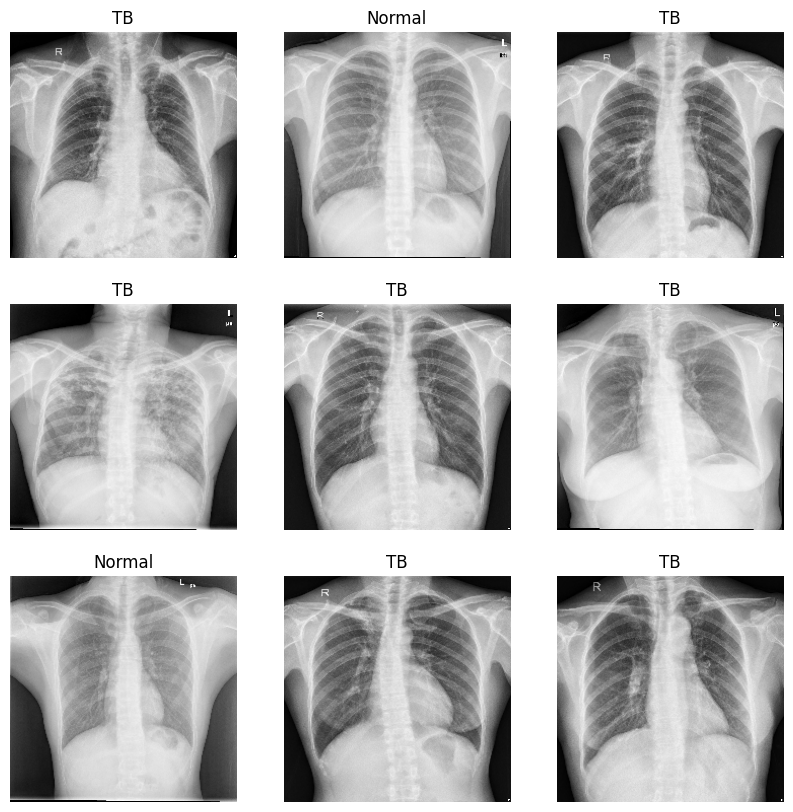

In [22]:
import matplotlib.pyplot as plt
import numpy as np

class_names = train_data.class_names  # Get class labels

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):  # Take one batch
    for i in range(9):  # Show 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [23]:
print("Train dataset shape:", train_data)
print("Validation dataset shape:", val_data)
print("Class labels:", train_data.class_names)


Train dataset shape: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation dataset shape: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Class labels: ['Normal', 'TB']


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Reduce overfitting
    layers.Dense(2, activation='softmax')  # 2 classes: Normal, TB
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Load dataset using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/train"
val_dir = "/content/drive/MyDrive/AROGYA/TB_Chest_Xray/test"

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'  # Matches sparse_categorical_crossentropy
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Now train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    verbose=1
)


Found 529 images belonging to 2 classes.
Found 133 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5373 - loss: 1.1325

FRONTEND
====================


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!pip install flask-ngrok


In [ ]:
!pip install flask


In [ ]:
!pip install flask flask-ngrok pyngrok numpy opencv-python tensorflow


In [18]:
import ipywidgets as widgets
from IPython.display import display
import requests

# Create a file upload widget
upload = widgets.FileUpload(accept='.jpg,.png,.jpeg', multiple=False)
display(upload)

def upload_and_predict(change):
    if upload.value:
        file_info = next(iter(upload.value.values()))
        file_name = file_info['metadata']['name']

        # Save uploaded file
        with open(file_name, 'wb') as f:
            f.write(file_info['content'])

        # API endpoint
        url = "http://xyz.ngrok.io/predict"

        # Upload the chosen image
        try:
            with open(file_name, 'rb') as f:
                files = {'file': f}
                response = requests.post(url, files=files)

            # Check if the response is valid JSON
            try:
                result = response.json()
                print("Prediction Result:", result)
            except requests.exceptions.JSONDecodeError:
                print("Error: Response is not valid JSON. Response text:", response.text)

        except requests.exceptions.RequestException as e:
            print("Request failed:", e)

upload.observe(upload_and_predict, names='value')


FileUpload(value={}, accept='.jpg,.png,.jpeg', description='Upload')

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator for loading dataset
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    'dataset_directory',  # Replace with actual dataset path
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'dataset_directory',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Define the model
model = keras.Sequential([
    layers.Input(shape=(224, 224, 3)),  # Corrected input shape
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes (Normal, TB)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    verbose=1
)


FileNotFoundError: [Errno 2] No such file or directory: 'dataset_directory'